In [1]:
%matplotlib inline

import sys
import os

# Allow notebook to access src/
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
import cv2

from src.config import *
from src.inference import load_model, load_vocab, generate_caption_beam


In [2]:
def visualize_attention(image_path, caption_words, attentions):
    image = cv2.imread(image_path)

    if image is None:
        print("Image not found:", image_path)
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    n = len(caption_words)
    cols = 4
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(15, 4 * rows))

    for i in range(n):
        attn = attentions[i].reshape(7, 7)
        attn = cv2.resize(attn, (w, h))
        attn = attn / (attn.max() + 1e-8)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.imshow(attn, cmap="jet", alpha=0.5)
        plt.title(caption_words[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()


Caption: a group of people in a red vest
Attention length check: 8 8
Image exists: True


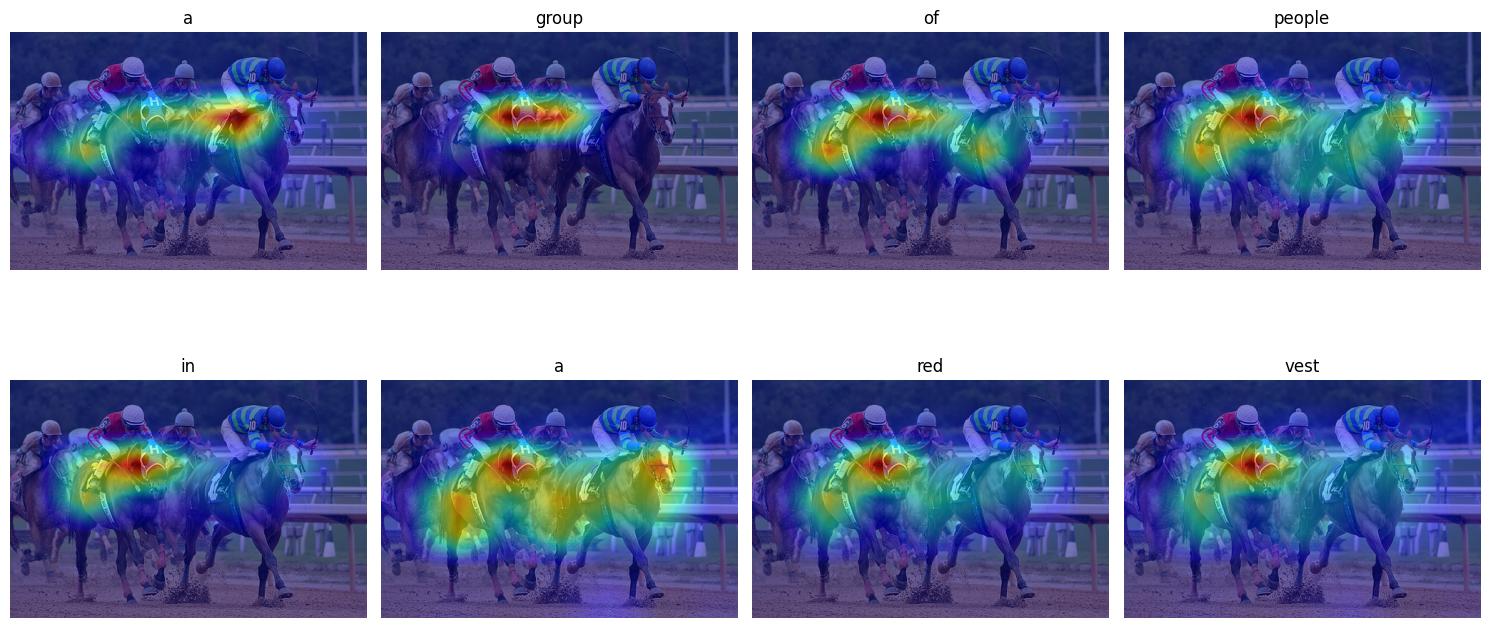

horse in vocab: True
horses in vocab: True


In [3]:
# Load vocab + model
word2idx, idx2word = load_vocab()
model = load_model(len(word2idx))

# Pick a validation feature file
val_features_dir = os.path.join(FEATURES_DIR, "val")
image_file = os.listdir(val_features_dir)[0]

feature_path = os.path.join(val_features_dir, image_file)
features = np.load(feature_path)

# Generate caption + attentions
caption, attentions = generate_caption_beam(
    model,
    features,
    word2idx,
    idx2word,
    beam_size=3
)

print("Caption:", caption)
print("Attention length check:", len(attentions), len(caption.split()))

# Construct image path
image_name = image_file.replace(".npy", "")
image_path = os.path.join(RAW_DATA_DIR, "Images", image_name)

print("Image exists:", os.path.exists(image_path))

# Visualize
visualize_attention(image_path, caption.split(), attentions)
print("horse in vocab:", "horse" in word2idx)
print("horses in vocab:", "horses" in word2idx)

